<div style="line-height:1.2;">

<h1 style="color:#F46233; margin-bottom: 0.2em;">Classification methods comparison 2</h1>

<h4 style="margin-top: 0.2em; margin-bottom: 0.5em;">5 Examples of various classification methods with scikit-learn:</h4>

- Logistic Regression
- Naive Bayes
- RandomForest
- Gradient Boosting
- Decision Tree
- SVC
- Nearest centroid
- MLP

</div>

<h3 style="color: lightblue; margin-top: 0.5em;">Keywords:</h3> seaborn heatmap + ROC


<div style="line-height:0.45">
<h1 style="color:#F46233  "> Classification methods comparison 2 </h1>
<h4> 5 Examples of various classification methods with scikit-learn.   <br>
</div>
<div style="line-height:1.4">
- Logistic Regression <br>
- Naive Bayes <br>
- RandomForest <br>
- Gradient Boosting <br>
- Decision Tree <br>
- SVC <br>
- Nearest centroid <br>
- MLP <br>
</div>
</h4>
</div>
<h3 style="color:lightblue"> Keywords: </h3> seaborn heatmap + ROC

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score

In [72]:
dataset_diabetes = pd.read_csv("./dataset/diabetes.csv")

In [73]:
print("size df is: {}".format(dataset_diabetes.size))
print("len df is: {}".format(len(dataset_diabetes)))
dataset_diabetes.tail()

size df is: 6912
len df is: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [74]:
for column in dataset_diabetes.columns:
    print("{col} has ".format(col = column),dataset_diabetes[dataset_diabetes[column]==0][column].count(),"zeros")

Pregnancies has  111 zeros
Glucose has  5 zeros
BloodPressure has  35 zeros
SkinThickness has  227 zeros
Insulin has  374 zeros
BMI has  11 zeros
DiabetesPedigreeFunction has  0 zeros
Age has  0 zeros
Outcome has  500 zeros


In [75]:
df = dataset_diabetes.copy()

In [76]:
features_dealing_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for features in features_dealing_with_zero:
    df[features].replace(0,np.nan,inplace=True)
    df[features].fillna(dataset_diabetes[features].mean(),inplace=True)

In [77]:
df.Insulin = df.Insulin.astype(int)
df.SkinThickness = df.SkinThickness.astype(int)

df.Outcome = df.Outcome.replace(0,-1)
df.Outcome = df.Outcome.astype(int)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,79,33.6,0.627,50,1
1,1,85.0,66.0,29,79,26.6,0.351,31,-1
2,8,183.0,64.0,20,79,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,-1
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [78]:
#### Split data
X = df.iloc[:-100,:-1]
x_test = df.iloc[-100:,:-1]
Y = df.iloc[:-100,-1]
y_test = df.iloc[-100:,-1]

<h2 style="color:#F46233  "> 1) Logistic Regression </h2>

In [79]:
training_score = []
testing_score = []
kfold = KFold(n_splits = 2)

In [80]:
""" Using LRclf = LogisticRegression() without arguments 
the default solver = lbfgs + default max_iter = 1000
With our data this lead to => ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
So, increasing 'max_iter' (Maximum number of iterations taken for the solvers to converge), solve the issue.


N.B. 
1) Decreasing too much the C parameter (inverse of the regularization strength => default is 1) reduce performances
2) Using the solver='sag' => reduce performances 
3) Changing solver / penalty or the max_iter don't have an impact 
LRclf = LogisticRegression(max_iter=500000, C=0.8, solver='newton-cholesky') 
LRclf = LogisticRegression(max_iter=100000, C=0.05, penalty='l1', solver='liblinear') 
"""
LRclf = LogisticRegression(max_iter=10000) 

######## Train on the 2 fold cross validation
for train_index, test_index in kfold.split(X):
    ## Sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    # Fit the logistic regression model on the training data
    LRclf.fit(X_train,Y_train)
    # Score
    training_score.append(LRclf.score(X,Y))
    # Predict 
    train_predictions = LRclf.predict(X_test)
    ## Threshold the predictions based on their mean value
    train_predictions[train_predictions < train_predictions.mean()] = -1
    train_predictions[train_predictions >= train_predictions.mean()] = 1
    # Compute the accuracy score on the testing data and append it to a list
    testing_score.append(accuracy_score(Y_test, train_predictions))

In [81]:
print("training_score{training_score}".format(training_score=training_score))
print("testing_score{testing_score}".format(testing_score=testing_score))

training_score[0.7574850299401198, 0.7784431137724551]
testing_score[0.7245508982035929, 0.811377245508982]


In [82]:
#### Performance of at 100 samples 
LR_preds = LRclf.predict(x_test)
LR_preds[LR_preds < LR_preds.mean()] = -1
LR_preds[LR_preds >= LR_preds.mean()] = 1
print(classification_report(y_test, LR_preds))

              precision    recall  f1-score   support

          -1       0.81      0.87      0.84        63
           1       0.75      0.65      0.70        37

    accuracy                           0.79       100
   macro avg       0.78      0.76      0.77       100
weighted avg       0.79      0.79      0.79       100



<Axes: >

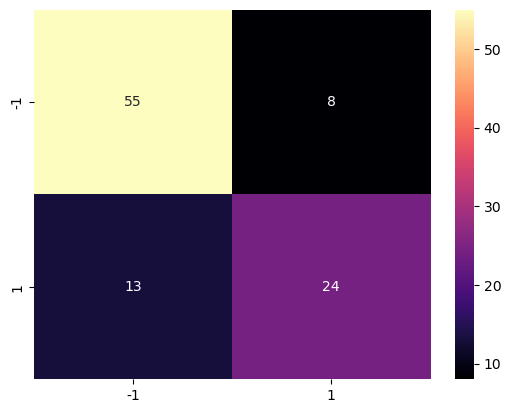

In [83]:
## Confusion matrix scores
cm = confusion_matrix(y_test, LR_preds)
sns.heatmap(cm, annot=True, cmap='magma', xticklabels=['-1','1'], yticklabels=['-1','1'])

<h2 style="color:#F46233  "> 2) Naive Bayes </h2>

In [84]:
GNB = GaussianNB()
training_score = []
testing_score = []

# Training on the 2 fold cross validation
for train_index, test_index in kfold.split(X):
#     print(train_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    GNB.fit(X_train,Y_train)
    training_score.append(GNB.score(X,Y))
    train_predictions = GNB.predict(X_test)
    testing_score.append(accuracy_score(Y_test, train_predictions))

In [85]:
print("training_score{training_score}".format(training_score=training_score))
print("testing_score{testing_score}".format(testing_score=testing_score))

training_score[0.7455089820359282, 0.7485029940119761]
testing_score[0.7065868263473054, 0.7754491017964071]


In [86]:
# Performance of at 100 samples
GNB_preds = GNB.predict(x_test)
print(classification_report(y_test, GNB_preds))

              precision    recall  f1-score   support

          -1       0.77      0.79      0.78        63
           1       0.63      0.59      0.61        37

    accuracy                           0.72       100
   macro avg       0.70      0.69      0.70       100
weighted avg       0.72      0.72      0.72       100



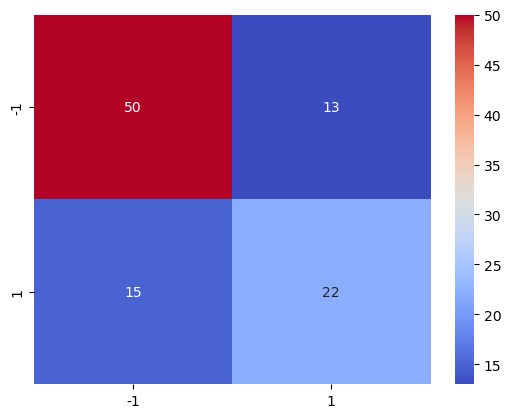

In [87]:
# Confusion matrix scores
cm = confusion_matrix(y_test, GNB_preds)
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=['-1','1'], yticklabels=['-1','1']);

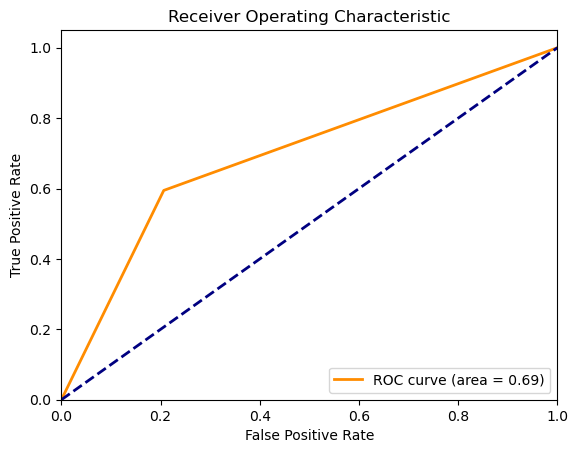

In [88]:
""" Receiver Operating Characteristic (ROC) Curve.
ROC is a graphical representation of the performance of a model binary classification.
It shows the tradeoff between the true positive rate (TPR) and the false positive rate (FPR) 
as the classification threshold is varied.
"""
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, GNB_preds)
# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)


########## Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

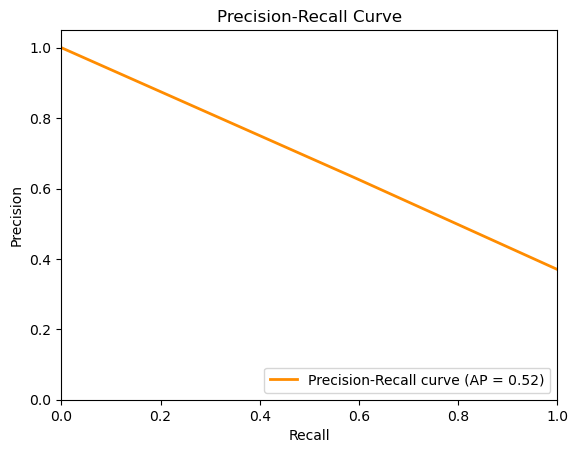

In [89]:
""" The precision-recall curve is a graphical representation of the performance of a binary classification model. 
It shows the tradeoff between the precision (positive predictive value) and recall (true positive rate) 
as the classification threshold is varied. 
"""
# Compute the precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, GNB_preds)
# Compute the average precision score
avg_precision = average_precision_score(y_test, GNB_preds)

############# Display the precision-recall curve
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [90]:
# Compute the F1 score
f1 = f1_score(y_test, GNB_preds)
print("F1 Score:", f1)

F1 Score: 0.611111111111111


<h2 style="color:#F46233  "> 3) Linear SVC </h2>

Linear SVC:
              precision    recall  f1-score   support

          -1       0.76      0.87      0.81        63
           1       0.71      0.54      0.62        37

    accuracy                           0.75       100
   macro avg       0.74      0.71      0.72       100
weighted avg       0.75      0.75      0.74       100



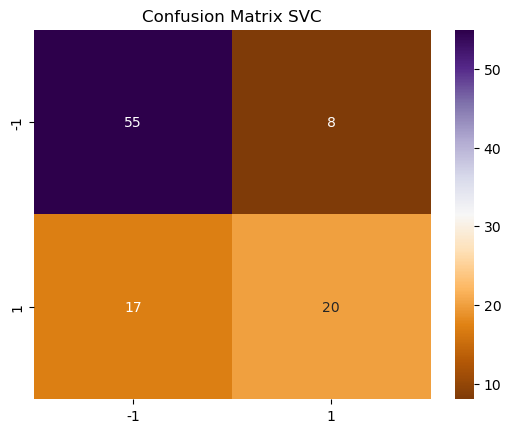

In [91]:
SVCclf = LinearSVC(max_iter=5000000, C=0.1)
SVC_training_score = []
SVC_testing_score = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    SVCclf.fit(X_train, Y_train)
    SVC_training_score.append(SVCclf.score(X, Y))
    train_predictions = SVCclf.predict(X_test)
    SVC_testing_score.append(accuracy_score(Y_test, train_predictions))

SVC_preds = SVCclf.predict(x_test)
print("Linear SVC:")
print(classification_report(y_test, SVC_preds))
cm = confusion_matrix(y_test, SVC_preds)
sns.heatmap(cm, annot=True, cmap='PuOr', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.title("Confusion Matrix SVC")
plt.show()

<h2 style="color:#F46233  "> 4) Random Forest </h2>

Random Forest:
              precision    recall  f1-score   support

          -1       0.84      0.86      0.85        63
           1       0.75      0.73      0.74        37

    accuracy                           0.81       100
   macro avg       0.80      0.79      0.80       100
weighted avg       0.81      0.81      0.81       100



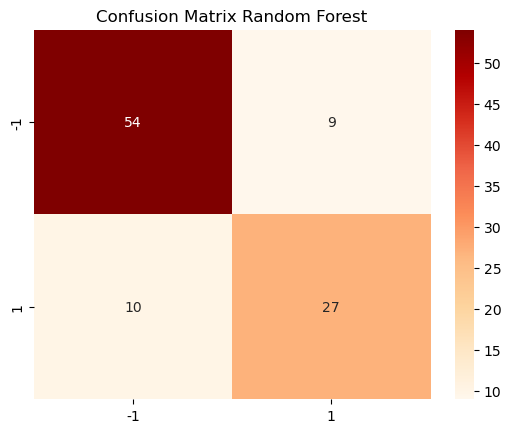

In [92]:
RFclf = RandomForestClassifier()
RF_training_score = []
RF_testing_score = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    RFclf.fit(X_train, Y_train)
    RF_training_score.append(RFclf.score(X, Y))
    train_predictions = RFclf.predict(X_test)
    RF_testing_score.append(accuracy_score(Y_test, train_predictions))

RF_preds = RFclf.predict(x_test)
print("Random Forest:")
print(classification_report(y_test, RF_preds))
cm = confusion_matrix(y_test, RF_preds)
sns.heatmap(cm, annot=True, cmap='OrRd', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.title('Confusion Matrix Random Forest')
plt.show()

<h2 style="color:#F46233  "> 5) Decision Tree </h2>

Decision Tree:
              precision    recall  f1-score   support

          -1       0.77      0.86      0.81        63
           1       0.70      0.57      0.63        37

    accuracy                           0.75       100
   macro avg       0.74      0.71      0.72       100
weighted avg       0.74      0.75      0.74       100



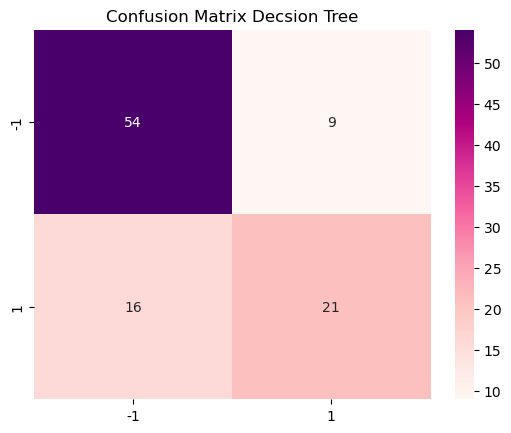

In [93]:
DTclf = DecisionTreeClassifier()
DT_training_score = []
DT_testing_score = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    DTclf.fit(X_train, Y_train)
    DT_training_score.append(DTclf.score(X, Y))
    train_predictions = DTclf.predict(X_test)
    DT_testing_score.append(accuracy_score(Y_test, train_predictions))

DT_preds = DTclf.predict(x_test)
print("Decision Tree:")
print(classification_report(y_test, DT_preds))
cm = confusion_matrix(y_test, DT_preds)
sns.heatmap(cm, annot=True, cmap='RdPu', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.title('Confusion Matrix Decsion Tree')
plt.show()

<h2 style="color:#F46233  "> 6) Gradient Boosting </h2>

Gradient Boosting:
              precision    recall  f1-score   support

          -1       0.83      0.79      0.81        63
           1       0.68      0.73      0.70        37

    accuracy                           0.77       100
   macro avg       0.75      0.76      0.76       100
weighted avg       0.77      0.77      0.77       100



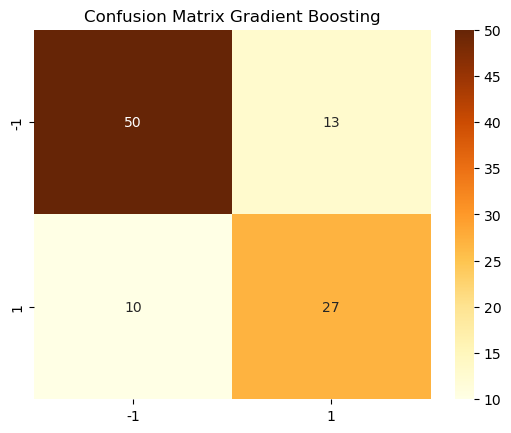

In [94]:
GBclf = GradientBoostingClassifier()
GB_training_score = []
GB_testing_score = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    GBclf.fit(X_train, Y_train)
    GB_training_score.append(GBclf.score(X, Y))
    train_predictions = GBclf.predict(X_test)
    GB_testing_score.append(accuracy_score(Y_test, train_predictions))

GB_preds = GBclf.predict(x_test)
print("Gradient Boosting:")
print(classification_report(y_test, GB_preds))
cm = confusion_matrix(y_test, GB_preds)
sns.heatmap(cm, annot=True, cmap='YlOrBr', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.title('Confusion Matrix Gradient Boosting')
plt.show()

<h2 style="color:#F46233  "> 7) Nearest Centroid </h2>

Nearest Centroid:
              precision    recall  f1-score   support

          -1       0.66      0.70      0.68        63
           1       0.42      0.38      0.40        37

    accuracy                           0.58       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.57      0.58      0.57       100



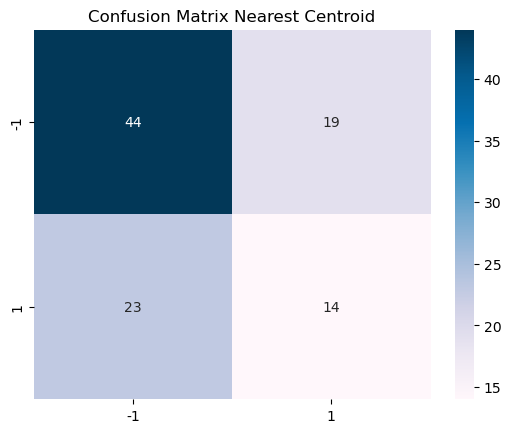

In [95]:
NCclf = NearestCentroid()
NC_training_score = []
NC_testing_score = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    NCclf.fit(X_train, Y_train)
    NC_training_score.append(NCclf.score(X, Y))
    train_predictions = NCclf.predict(X_test)
    NC_testing_score.append(accuracy_score(Y_test, train_predictions))

NC_preds = NCclf.predict(x_test)
print("Nearest Centroid:")
print(classification_report(y_test, NC_preds))
cm = confusion_matrix(y_test, NC_preds)
sns.heatmap(cm, annot=True, cmap='PuBu', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.title('Confusion Matrix Nearest Centroid')
plt.show()

<h2 style="color:#F46233  "> 8) Multi-Layer Perceptron (MLP) </h2>

/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/notto4/anaconda3/envs/MLearning/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron (MLP):
              precision    recall  f1-score   support

          -1       0.68      0.78      0.73        63
           1       0.50      0.38      0.43        37

    accuracy                           0.63       100
   macro avg       0.59      0.58      0.58       100
weighted avg       0.61      0.63      0.62       100



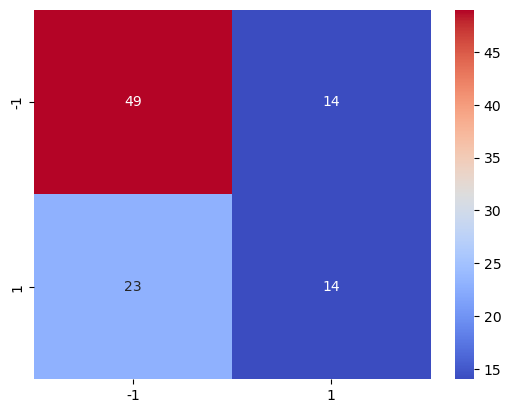

In [96]:
MLPclf = MLPClassifier()
MLP_training_score = []
MLP_testing_score = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    MLPclf.fit(X_train, Y_train)
    MLP_training_score.append(MLPclf.score(X, Y))
    train_predictions = MLPclf.predict(X_test)
    MLP_testing_score.append(accuracy_score(Y_test, train_predictions))

MLP_preds = MLPclf.predict(x_test)
print("Multi-Layer Perceptron (MLP):")
print(classification_report(y_test, MLP_preds))
cm = confusion_matrix(y_test, MLP_preds)
sns.heatmap(cm, annot=True, cmap='coolwarm', xticklabels=['-1', '1'], yticklabels=['-1', '1'])
plt.show()